In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
# sys.path.insert(1, '/home/idris/workspace_python/symbac/SyMBac/') # Not needed if you installed SyMBac using pip
import skimage
import matplotlib.pyplot as plt

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images

/home/lady5906/workspace_python/symbac/SyMBac/cell_simulation.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# OPTIONS
show_window = False
save_dir = "/home/lady5906/workspace_python/symbac/EvomachineData/Symbac_Training_Data_2013-12-21_ovalcells"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
else:
    if os.listdir(save_dir):
        msg = f"The directory {save_dir} already exists and is not empty."
        print(msg)
        # raise ValueError(f"The directory {save_dir} already exists and is not empty.")
save_mask = "/home/lady5906/workspace_python/symbac/EvomachineData/Symbac_Training_Data_2023-12-20/evomask.p"
real_image = skimage.io.imread("/home/lady5906/workspace_python/symbac/example_image.tiff")

trench_length = 15  # um
trench_width = 3  # um
pix_mic_conv = 0.1625  # Micron per pixel conversion factor             -> 6.5/40, MH4
resize_amount = 3  # Upscaling factor, typically chosen to be 3         -> Upscaling before convolution

# CELLS
cell_max_length = 4.5  # um
# cell_width = 1.5  # um
cell_width = 2.5  # um
max_length_var = 0.5  # um, NOTE: all _var are in fact STDs
width_var = 0.5  # um
lysis_p = 0.  # [0,1]

# SIMULATION
sim_length = 40
gravity = 1
phys_iters = 15
label_masks = True

my_simulation = Simulation(
    trench_length=trench_length, trench_width=trench_width,
    cell_max_length=cell_max_length, cell_width=cell_width,
    max_length_var=max_length_var, width_var=width_var, lysis_p=lysis_p,
    pix_mic_conv=pix_mic_conv, resize_amount=resize_amount,
    gravity=gravity, phys_iters=phys_iters, sim_length=sim_length, save_dir=save_dir,
)
my_simulation.run_simulation(show_window=False, init_id=1)


The directory /home/lady5906/workspace_python/symbac/EvomachineData/Symbac_Training_Data_2013-12-21_ovalcells already exists and is not empty.


  0%|          | 0/40 [00:00<?, ?it/s]

At iteration 0 (#1 cells)
Cells before: [(1, Vec2d(62.69230769230769, 64.61538461538461), 83.07692307692307, 129.23076923076923)]
After updating cell length: [(1, Vec2d(62.69230769230769, 67.13101215531933), 88.1081781567925, 134.26202431063865)]
Before updating cell bodies: [(1, Vec2d(62.69230769230769, 33.56550607765966), 20.97716600147318, 67.13101215531933), (2, Vec2d(62.69230769230769, 100.69651823297899), 20.97716600147318, 69.29149111435316)]
Updated cell bodies: [(1, Vec2d(62.69230769230769, 33.828006077659666), 20.97716600147318, 67.13101215531933), (2, Vec2d(62.69230769230769, 100.95901823297898), 20.97716600147318, 69.29149111435316)]
Updated cells: [(1, Vec2d(62.69230769230769, 33.828006077659666), 20.97716600147318), (2, Vec2d(62.69230769230769, 100.95901823297898), 20.97716600147318)]
At iteration 1 (#2 cells)
Cells before: [(1, Vec2d(62.69230769230769, 33.828006077659666), 20.97716600147318, 67.13101215531933), (2, Vec2d(62.69230769230769, 100.95901823297898), 20.9771660

In [4]:
my_simulation.run_simulation(show_window=True, init_id=1)

# At iteration 0 (#1 cells)
# Cells before: [(1, Vec2d(62.69230769230769, 64.61538461538461), 83.07692307692307, 129.23076923076923)]
# After updating cell length: [(1, Vec2d(62.69230769230769, 64.61538461538461), 87.68718179125365, 133.8410279450998)]
# Before updating cell bodies: [(1, Vec2d(62.69230769230769, 31.155127629109664), 20.766667818703752, 66.9205139725499), (2, Vec2d(62.69230769230769, 98.07564160165956), 20.766667818703752, 66.99508449577691)]
# Updated cell bodies: [(1, Vec2d(62.69230769230769, 31.181377629109665), 20.766667818703752, 66.9205139725499), (2, Vec2d(62.69230769230769, 98.10189160165955), 20.766667818703752, 66.99508449577691)]
# Updated cells: [(1, Vec2d(62.69230769230769, 31.181377629109665), 20.766667818703752), (2, Vec2d(62.69230769230769, 98.10189160165955), 20.766667818703752)] SEE Y COORDINATE JUMPING

At iteration 0 (#1 cells)
Cells before: [(1, Vec2d(62.69230769230769, 64.61538461538461), 83.07692307692307, 129.23076923076923)]
After updating cell length: [(1, Vec2d(62.69230769230769, 66.75632768674384), 87.35880921964151, 133.51265537348766)]
Before updating cell bodies: [(1, Vec2d(62.69230769230769, 33.37816384337193), 20.602481532897684, 66.75632768674383), (2, Vec2d(62.69230769230769, 100.13449153011575), 20.602481532897684, 64.91179322546704)]
Updated cell bodies: [(1, Vec2d(62.69230769230769, 33.6415923155381), 20.602481532897684, 66.75632768674383), (2, Vec2d(62.69230769230769, 100.39792000228192), 20.602481532897684, 64.91179322546704)]
Updated cells: [(1, Vec2d(62.69230769230769, 33.6415923155381), 20.602481532897684), (2, Vec2d(62.69230769230769, 100.39792000228192), 20.602481532897684)]
At iteration 1 (#2 cells)
Cells before: [(1, Vec2d(62.69230769230769, 33.6415923155381), 20.602481532897684, 66.75632768674383), (2, Vec2d(62.69230769230769, 100.39792000228192), 20.60248

In [114]:

x1 = my_simulation.cell_timeseries[18]
print([x.ID for x in x1])
print([x.position for x in x1])
x2 = my_simulation.cell_timeseries[19]
print([x.ID for x in x2])
print([x.position for x in x2])

print([[x.ID for x in xx] for xx in my_simulation.cell_timeseries[:20]])


[1]
[54.84069698773184]
[1, 3]
[Vec2d(58.69917718684218, 151.79929745763573), Vec2d(43.89491211657744, 67.03186008825013)]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1, 3]]


In [3]:
my_simulation.draw_simulation_OPL(do_transformation=False, label_masks=label_masks)
my_simulation.visualise_in_napari()

Timeseries Properties:   0%|          | 0/41 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/41 [00:00<?, ?it/s]

[0 1]
[0 1 2 3 4]


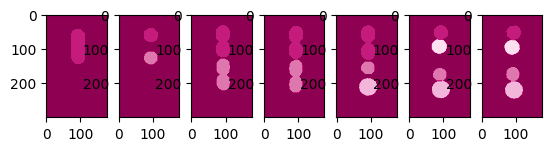

In [12]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np

masks = my_simulation.masks[0:2]
masks.extend(my_simulation.masks[30:35])
print(np.unique(masks[0]))
print(np.unique(masks[-1]))
n = 10
cmap = cm.get_cmap('PiYG', n+1)
fig, axs = plt.subplots(1, len(masks))
_ = [ax.imshow(m, cmap=cmap, vmin=0, vmax=n) for (ax, m) in zip(axs, masks)]

In [10]:

my_simulation.visualise_in_napari()


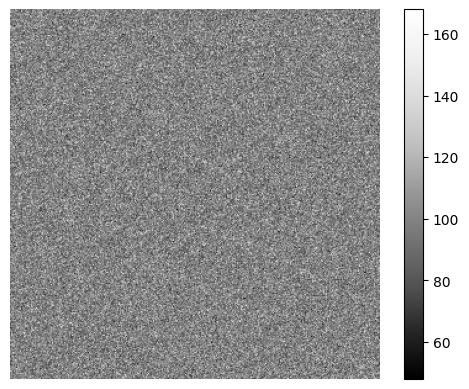

array([[114,  93,  97, ..., 113,  88,  95],
       [121,  97, 109, ...,  86, 105,  98],
       [126, 114, 105, ..., 111, 106,  98],
       ...,
       [106,  95,  82, ..., 100,  70,  92],
       [102, 108,  92, ...,  96, 106, 104],
       [ 98,  88,  97, ..., 113,  85, 107]])

In [16]:
# CAMERA
baseline = 100
sensitivity = 2.9
dark_noise = 8


my_camera = Camera(
    baseline=baseline, sensitivity=sensitivity, dark_noise=dark_noise
)
my_camera.render_dark_image(size=(300, 300))


calc
plot


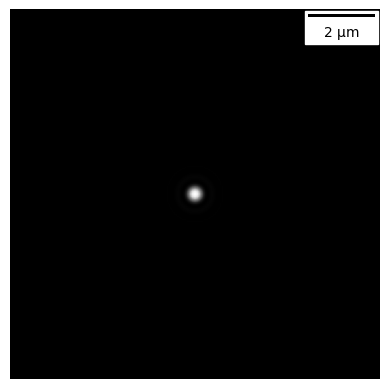

end


In [17]:
# PSF
mode = "simple fluo"
radius = 100  # Radius of the PSF                                        -> unclear
wavelength = 0.450  # Wavelength of imaging light in micron              -> 450nm-650nm, MH12
num_ap = 0.95  # Numerical aperture of the objective lens               -> 0.95 or 1.42, MH4
ref_ind = 1.3  # Refractive index of the imaging medium                 -> unclear

my_kernel = PSF_generator(
    mode="simple fluo", radius=radius, wavelength=wavelength, NA=num_ap, n=ref_ind,
    resize_amount=resize_amount, pix_mic_conv=pix_mic_conv, apo_sigma=0.
)
print("calc")
my_kernel.calculate_PSF()
print("plot")
if True:
    my_kernel.plot_PSF()
    
    #input("Press Enter to continue...")

print("end")

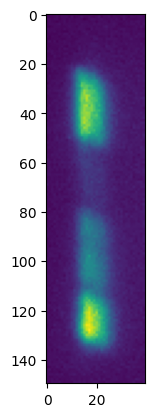

In [18]:
import matplotlib.pyplot as plt

plt.imshow(real_image[145:295,545:585])


In [19]:
save_mask = "/mnt/EvomachineData/Symbac_Training_Data_2013-12-20/evomask.p"
my_renderer = Renderer(
    simulation=my_simulation, PSF=my_kernel, real_image=real_image[145:295,545:585], camera=my_camera
)

my_renderer.select_intensity_napari(fname_param=save_mask)

my_renderer.optimise_synth_image(manual_update=True)

(286, 95)
Loading mask from /mnt/EvomachineData/Symbac_Training_Data_2013-12-20/evomask.p


interactive(children=(IntSlider(value=75, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [20]:

my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=0, n_samples = 20000, save_dir=save_dir, in_series=False)

Sample generation:   0%|          | 0/20000 [00:00<?, ?it/s]

/home/hslab/workspace_python/symbac_daoxin/SyMBac/renderer.py:341: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(matched, real_resize, multichannel=False)
/home/hslab/workspace_python/symbac_daoxin/SyMBac/renderer.py:358: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  noisy_img = match_histograms(noisy_img, real_resize, multichannel=False)
Sample generation: 100%|██████████| 20000/20000 [28:08<00:00, 11.84it/s]


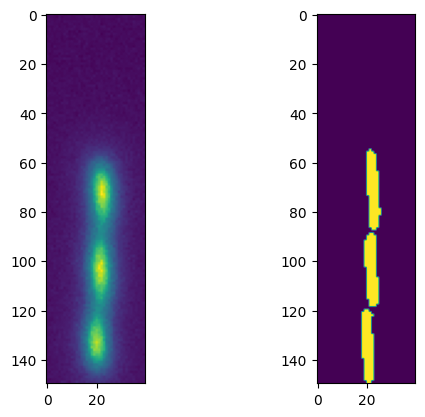

In [48]:
f1 = save_dir+"/img/synth_00000.tif"
f2 = save_dir+"/seg/synth_00000.tif"

fig, axs = plt.subplots(1, 2)
axs[0].imshow(skimage.io.imread(f1))
axs[1].imshow(skimage.io.imread(f2))